# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. `Pandas` и `Seaborn`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 4 балла
* Задача 2 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 5 баллов
* Задача 4 &mdash; 3 балла
* Задача 5 &mdash; 8 баллов

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid', font_scale = 1.3, palette = 'Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv` со следующими полями:
* `school` &mdash; номер школы;
* `test_score` &mdash; результат одного ученика из этой школы;
* `number_of_students` &mdash; кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

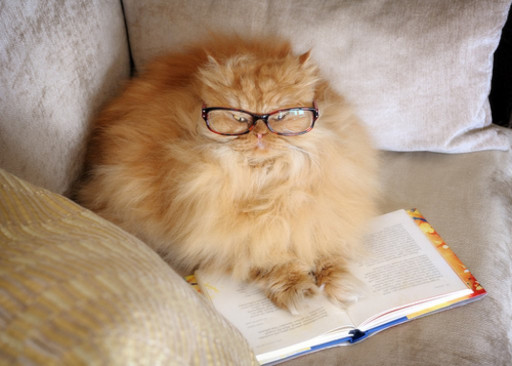

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

*Подсказка.* Это можно сделать с помощью методов  <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [482]:
cat_df = pd.read_csv('cat_exam_data.csv', sep = ',')
cat_df.head()

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [483]:
cat_df.isna().sum()

school                  0
test_score            204
number_of_students      0
dtype: int64

In [484]:
cat_df = cat_df.dropna()

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.

In [485]:
cat_df.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,-0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Отдельного внимания заслуживает среднее. Какими способами его можно посчитать? Произведите вычисления и *подробно* проинтерпретируйте результаты. Что стоит публиковать в официальной статистике?

Средний балл можно посчитать разными способами:

 * Вычислить среднее арифметическое баллов по всем студентам (значение `mean`)
  
 * Вычислить среднее арифметическое баллов по школам (плохо использовать, ибо не учитывается число студентов в школе)
  
 * Вычислить взвешенное среднее баллов по школам
 
 * Вычислить медиану и моду
 
В офиц.статистике я бы опубликовал среднее арифм. баллов студентов, так как в данной выборке отсутствуют выбросы, которые могли бы сильно повлиять на наше среднее

In [486]:
avg_by_students = cat_df['test_score'].mean()

scores = cat_df.groupby('school')['test_score']
schools_count = scores.count().count()
avg_by_schools = scores.mean().sum() / schools_count

weighted_avg = (scores.mean() * scores.count() / 
                scores.count().sum()).sum()

print("avg_by_students = ", avg_by_students)
print("avg_by_schools =", avg_by_schools)
print("weighted_avg =", weighted_avg)
print("median =", cat_df['test_score'].quantile())
print("mode =", cat_df['test_score'].mode().values[0])

avg_by_students =  51.68178826307748
avg_by_schools = 51.71075790943222
weighted_avg = 51.68178826307748
median = 52.0
mode = 52.0


Посчитайте сколько котиков получили 100 баллов.

In [487]:
(cat_df['test_score'] == 100).sum()

51

Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.
Отсортируйте эти школы по количеству стобалльников.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [488]:
grouped = cat_df.groupby(['school']).max()
max_schools = grouped[grouped['test_score'] == 100].index.array

max_df = cat_df[cat_df['school'].isin(max_schools)]
max_grouped = max_df.groupby(['school'])
max_grouped['test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
4,1014.0,51.025641,14.218828,6.0,41.0,52.0,61.0,100.0
14,776.0,51.916237,14.877806,10.0,42.0,52.0,62.0,100.0
18,715.0,51.173427,14.853651,4.0,41.0,52.0,62.0,100.0
42,650.0,52.286154,14.097546,5.0,43.0,52.0,62.0,100.0
69,1011.0,50.994065,14.207792,5.0,42.0,50.0,60.0,100.0
82,555.0,52.981982,14.600197,6.0,43.0,53.0,63.0,100.0
90,1244.0,51.049035,13.988503,3.0,41.0,51.0,61.0,100.0
91,749.0,51.732977,14.600317,2.0,42.0,52.0,61.0,100.0
96,943.0,52.152704,13.681081,12.0,42.0,52.0,62.0,100.0


Посчитайте средний результат каждой из школ и посмотрите на результат. Рассматриваем все школы, не только со стобальниками.

*Подсказка.* Может помочь метод <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [489]:
avg_scores = cat_df.groupby(['school']).mean()
avg_scores

,test_score,number_of_students
school,,
0,52.294258,418
1,52.028950,1209
2,51.751451,1035
3,51.566265,1245
4,51.025641,1015
...,...,...
495,50.933275,1139
496,51.146402,1209
497,51.141228,1140


Отсортируйте школы по среднему результату.

In [490]:
sorted_avg_scores = avg_scores.sort_values(by = ['test_score'], 
                                           ascending = False)
sorted_avg_scores

,test_score,number_of_students
school,,
57,53.341682,560
124,52.993311,598
263,52.982063,669
82,52.981982,555
366,52.970207,773
...,...,...
194,50.406977,774
471,50.362500,960
486,50.325000,800


Посмотрите на топ 10 лучших результатов.

In [99]:
sorted_avg_scores.head(10)

,test_score,number_of_students
school,,
57,53.341682,560
124,52.993311,598
263,52.982063,669
82,52.981982,555
366,52.970207,773
465,52.957555,1179
169,52.932401,858
449,52.910364,357
477,52.898515,808


**Вывод:** Число обучающихся в школах с самым высоким средним баллом варьируется от 350 до 1200

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.

In [100]:
sorted_avg_scores.tail(10)

,test_score,number_of_students
school,,
383,50.716981,636
264,50.702906,929
48,50.690293,649
156,50.641354,1093
394,50.461538,1079
194,50.406977,774
471,50.362500,960
486,50.325000,800
211,50.248571,351


**Вывод:** Число обучающихся в школах с самым низким средним баллом варьируется от 330 до 1100

Постройте график зависимости среднего результата ЕКЭ от количества учеников.

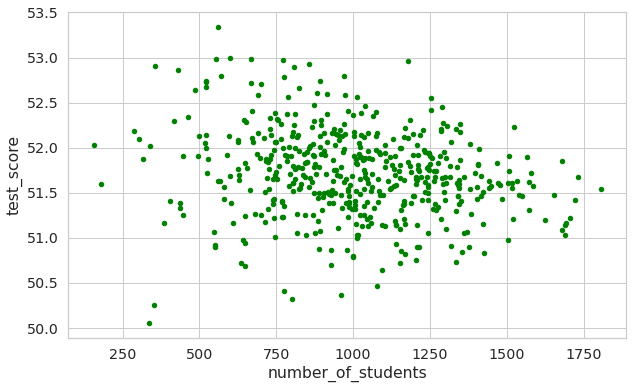

In [491]:
ax = avg_scores.plot(figsize = (10, 6), 
                     x = 'number_of_students', 
                     y = 'test_score', 
                     kind = 'scatter', 
                     color = ['green'])

**Вывод:** Исходя из того факта, что бол-во точек на графике находятся в его центре, можно сделать вывод о том, что средний балл по школе и число обучающихся в ней никак не связаны. 

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников.

In [492]:
big_size = 1000
small_schools = avg_scores[avg_scores['number_of_students'] <= big_size]
huge_schools = avg_scores[avg_scores['number_of_students'] > big_size]

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` &mdash; число бинов гистограммы;
* `alpha=0.5` &mdash; прозрачность бинов.

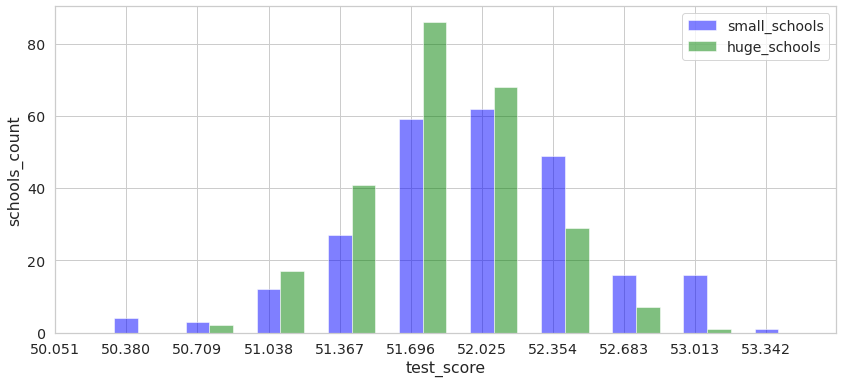

In [493]:
fig, ax = plt.subplots(figsize = (14, 6))

min_score = avg_scores['test_score'].min()
max_score = avg_scores['test_score'].max()
bins = np.linspace(min_score, max_score, 11)

small_heights, small_bins = np.histogram(small_schools, bins = bins)
huge_heights, huge_bins = np.histogram(huge_schools, bins = bins)

width = (bins[1] - bins[0]) / 3

ax.bar(bins[1:], small_heights, width, 
       facecolor = 'blue', alpha = 0.5, label = 'small_schools')
ax.bar(bins[1:] + width, huge_heights, width, 
       facecolor = 'green', alpha = 0.5, label = 'huge_schools')

plt.xlabel('test_score')
plt.ylabel('schools_count')
plt.xticks(bins)
plt.legend(fontsize=14, loc=1)
plt.show()

**Вывод:** Из гистограмм двух выборок можно понять, что средние баллы "больших" школ сосредоточены возле среднего, а "маленьких" школ - чуть разбросаны

---

### Задача 2

Задача заключается в работе с данными о трендах на <a target="_blank" href="https://www.youtube.com/">YouTube</a>. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

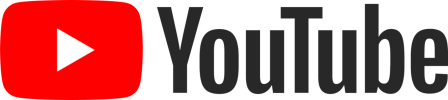


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a target="_blank" href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

*Замечание. Часто считывание дат &mdash; головная боль аналитика.*

In [4]:
df = pd.read_csv('RUvideos_short.csv', sep = ',')
df['trending_date'] = pd.to_datetime(df['trending_date'], format = '%y.%d.%m')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` &mdash; дата в формате год-день-месяц;
* `category_id` &mdash; категория видео, названия приведены в файле `RU_category_id.json`;
* `views` &mdash; количество просмотров видео;
* `likes` &mdash; количество лайков;
* `dislikes` &mdash; количество дислайков;
* `comment_count` &mdash; количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у объекта даты. Напечатайте начало таблицы.

In [5]:
df = df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
df['trending_date'] = df['trending_date'].dt.day
df.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

"Ящики" в графике сильно сжались из-за неправильного выбора шкалы по оси Y

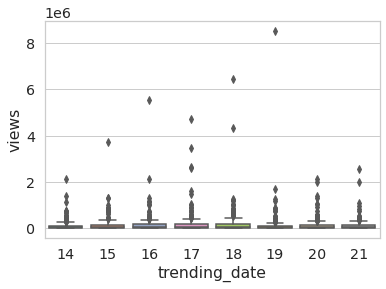

In [353]:
ax = sns.boxplot(x = 'trending_date', y = 'views', data = df)

Исправьте этот недостаток, установив некоторое значение. 

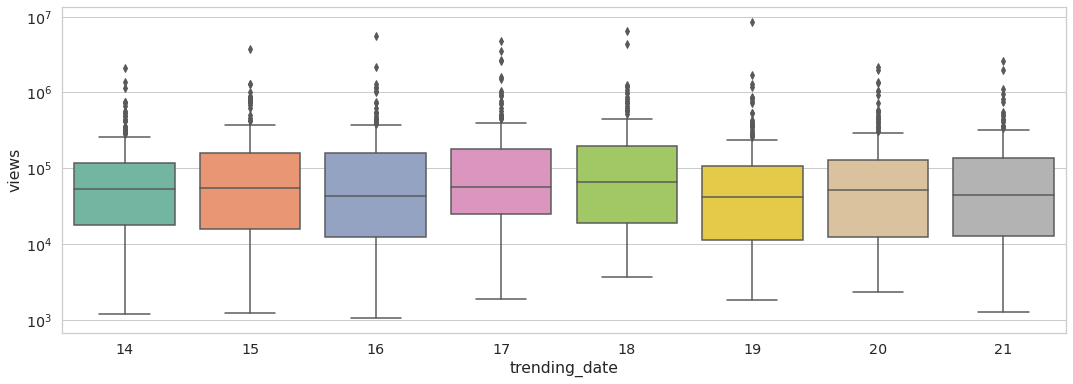

In [356]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_yscale('log')

ax = sns.boxplot(x = 'trending_date', y = 'views', data = df, ax = ax)

Постройте `jointplot` по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

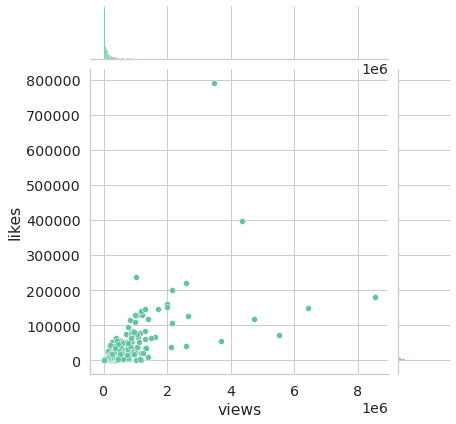

In [38]:
ax = sns.jointplot(x = 'views', 
                   y = 'likes', 
                   data = df,
                   kind = 'scatter')

Исправьте этот недостаток.

In [134]:
def get_avg_rng(data, minim = -np.Inf, maxim = np.Inf):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    return (max(lower, minim), min(upper, maxim))

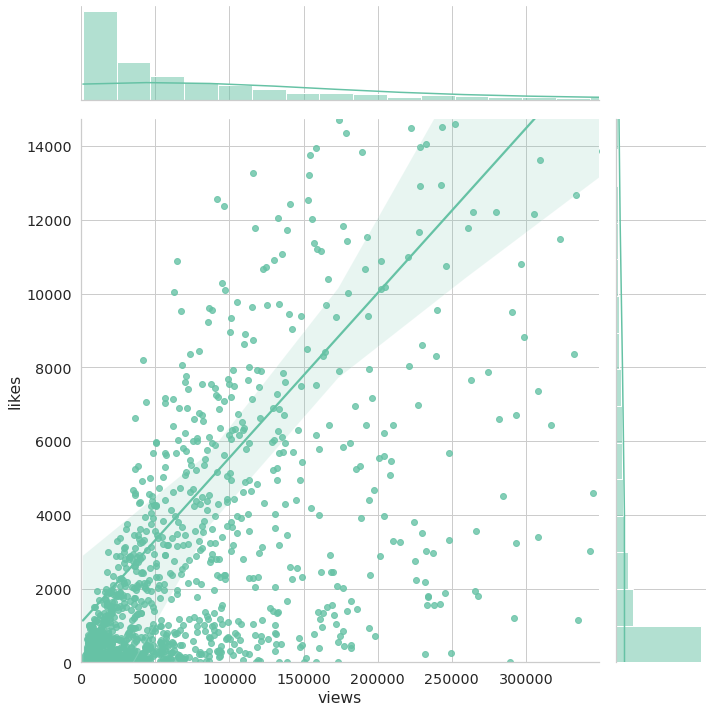

In [135]:
views_avg_rng = get_avg_rng(df['views'], minim = 0)
likes_avg_rng = get_avg_rng(df['likes'], minim = 0)

ax = sns.jointplot(x = 'views', 
                   y = 'likes', 
                   data = df,
                   height = 10, 
                   xlim = views_avg_rng, 
                   ylim = likes_avg_rng, 
                   kind = 'reg')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 3

<a target="_blank" href="https://www.netflix.com">Netflix</a> за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


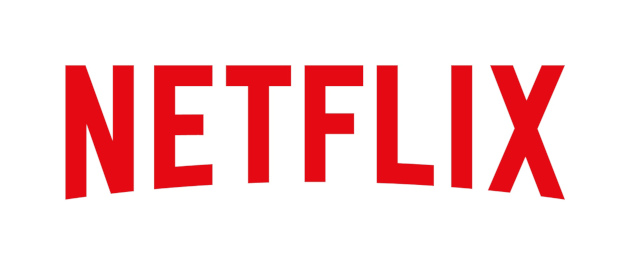

Описание признаков:
* `title` &mdash; название шоу;
* `rating` &mdash; рейтинг шоу. Например: G, PG, TV-14, TV-MA;
* `ratingLevel` &mdash; описание рейтинговой группы и особенностей шоу;
* `release year` &mdash; год выпуска шоу;
* `user rating score` &mdash; оценка пользователей.


Загрузите данные, выполнив код ниже.

In [255]:
data = pd.read_csv('netflix_data.csv', encoding='cp437')

del data['ratingDescription'], data['user rating size']
data.head()

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0


Удалите из данных дупликаты. Сколько объектов удалено?

In [256]:
old_size = data.shape[0]
data = data.drop_duplicates()
new_size = data.shape[0]

old_size - new_size

500

Сколько объектов осталось?

In [7]:
data.shape[0]

500

Есть ли в данных пропуски?

Если да, то при дальнейшем анализе подумайте, как их корректнее обработать. Учтите, что многие методы умеют работать с пропусками.

In [257]:
data.isna().sum()

title                  0
rating                 0
ratingLevel           33
release year           0
user rating score    244
dtype: int64

Пропуски есть в столбцах `ratingLevel` и `user rating score`  
Я решил в первом случае не заполнять пропуски, а во втором случае заполнить их -1 для дальнейшей обработки

In [258]:
data['user rating score'].fillna(value = -1, inplace = True)
data.isna().sum()

title                 0
rating                0
ratingLevel          33
release year          0
user rating score     0
dtype: int64

Сколько рейтинговых групп представлено в данных?

In [156]:
data['rating'].unique().size

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

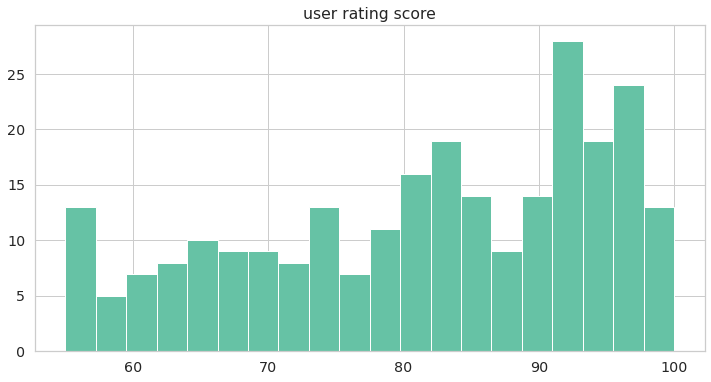

In [338]:
data_known_rate = data[data['user rating score'] != -1]
min_rating = data_known_rate['user rating score'].min()

rng = (min_rating, 100)
axes = data_known_rate.hist(column = 'user rating score', range = rng, 
                           bins = 20, figsize = (12, 6))

**Вывод:** Из гистограммы можно увидеть, что пользователи чаще всего ставят баллы в промежутках между 80 и 85, 90 и 97

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [30]:
data_known_rate['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

**Ответ:**  
Медиана и среднее отличаются приблизительно на 2.1 балла.  
Эти характеристики могут довольно сильно отличаться, поскольку это разные типы средних: первое - арифметическое, а второе - количественное.  
В нижеприведённом примере разница между этими величинами велика: медиана равна 10, а среднее приблизительно равно 50

In [52]:
lst = [0, 100] * 100
lst.append(10)
arr = pd.Series(lst)
arr.describe()

count    201.000000
mean      49.800995
std       50.079539
min        0.000000
25%        0.000000
50%       10.000000
75%      100.000000
max      100.000000
dtype: float64

В какие годы были запущены шоу, представленные в датасете?

In [332]:
min_year = data['release year'].min()
max_year = data['release year'].max()
rng = (min_year, max_year)
rng

(1940, 2017)

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

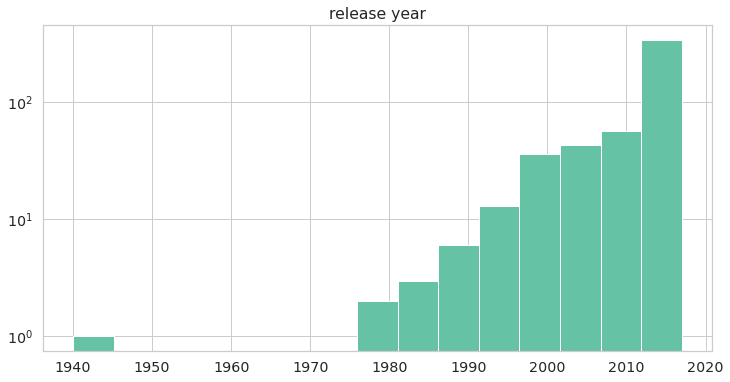

In [171]:
axes = data.hist(column = 'release year', range = rng, log = True, figsize = (12, 6), bins = 15)

In [151]:
# Проверка наличия выбросов с помощью межквартильного метода
years_cnt = data.groupby('release year')['user rating score'].count()
q25 = years_cnt.quantile(0.25)
q75 = years_cnt.quantile(0.75)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = years_cnt[(years_cnt < lower) | (years_cnt > upper)]
outliers

release year
2012     27
2013     33
2014     35
2015     61
2016    146
2017     37
Name: user rating score, dtype: int64

**Вывод:** Из гистограммы видно, что к-во запущенных шоу растёт с каждым годом, причём за последние 5-7 лет произошёл сильный скачок.  
Также в данных были обнаружены выбросы, а именно - в 2012 - 2017 годах

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? "Успешнее" означает, что пользователи в среднем ставили более высокие оценки.
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [172]:
def get_avg_score(year = 2000):
    year_data = data_known_rate[data_known_rate['release year'] == year]
    return year_data['user rating score'].mean()


print('2016:', get_avg_score(2016))
print('2017:', get_avg_score(2017))

2016: 84.31395348837209
2017: 88.125


**Вывод:** несмотря на то, что средняя оценка за 2017 год почти на 4 балла больше средней оценки за 2016 год, говорить о том, что 2017 год "успешнее" 2016 некорректно, так как в 2016 году было выпущено в 4 раза больше шоу, чем в 2017

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? [Подсказка](https://mipt-stats.gitlab.io/courses/ad_fivt/Jobs.jpg)

Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

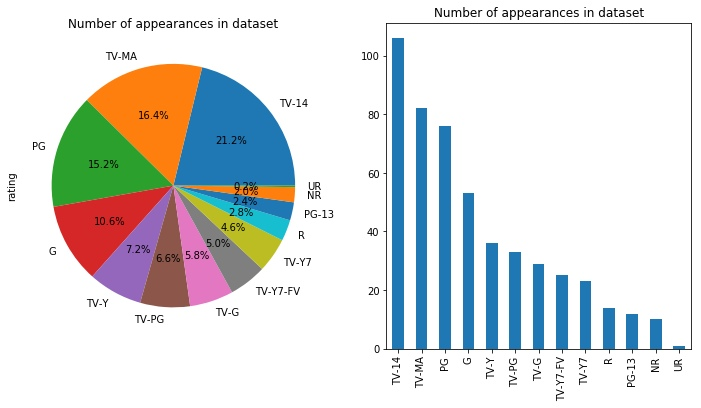

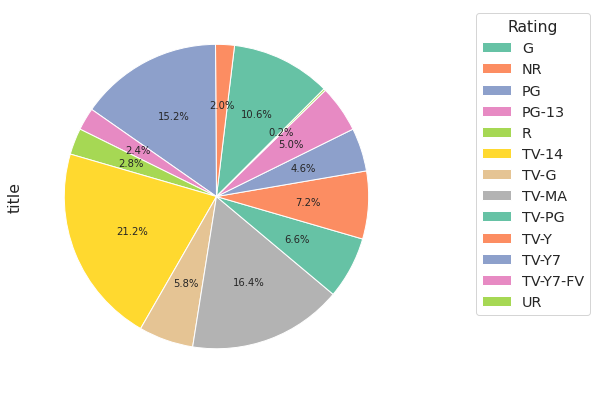

In [324]:
pie_input = data.groupby('rating').title.count()
labels = pie_input.index.values

axes = pie_input.plot.pie(startangle = 45, 
                          autopct = "%.1f%%", 
                          labelditance = None, 
                          figsize = (7, 7))

leg = axes.legend(title = 'Rating', 
                  loc = 'best', 
                  bbox_to_anchor = (1.5, 1))

**Вывод:** В примере с двумя графиками круговая диаграмма выглядит лучше, поскольку на ней чётко видны соотношения между различными рейтингами. Плюс, в гистограмме названия стлбцов повернуты на 90 шрадусов, что затрудняет чтение графика

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится. Обозначим это шоу N.
Ответьте на следующие вопросы.
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [329]:
size = 13
top = data.sort_values(by = ['user rating score'], ascending = False).head(size)

# N = 'Family Guy',
ind = 11
tbl_ind = top.index[ind] # 62
N = top['title'][tbl_ind]

# 1
N_rate_shows = data[data.rating == top.rating[tbl_ind]]
N_rate_shows = N_rate_shows[N_rate_shows['user rating score'] != -1]
min_score = N_rate_shows['user rating score'].min()
worst_show = N_rate_shows[N_rate_shows['user rating score'] == min_score]

print('Worst show:', worst_show.title.values[0])

# 2
N_year = top['release year'][tbl_ind]
N_year_shows = data[data['release year'] == N_year]
N_year_shows_cnt = N_year_shows.title.count()

print(N_year_shows_cnt)

# 3
old_sum = N_year_shows['user rating score'].sum()
new_sum = old_sum - top['user rating score'][tbl_ind]

old_mean = N_year_shows['user rating score'].mean()
new_mean = new_sum / (N_year_shows['user rating score'].count() - 1)

print('old_mean:', old_mean)
print('new_mean:', new_mean)
print('delta:', old_mean - new_mean)

Worst show: Bitten
61
old_mean: 42.9344262295082
new_mean: 42.016666666666666
delta: 0.9177595628415318


Ответьте на следующие вопросы, проанализировав `boxplot`-график.
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет, за которые есть данные? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

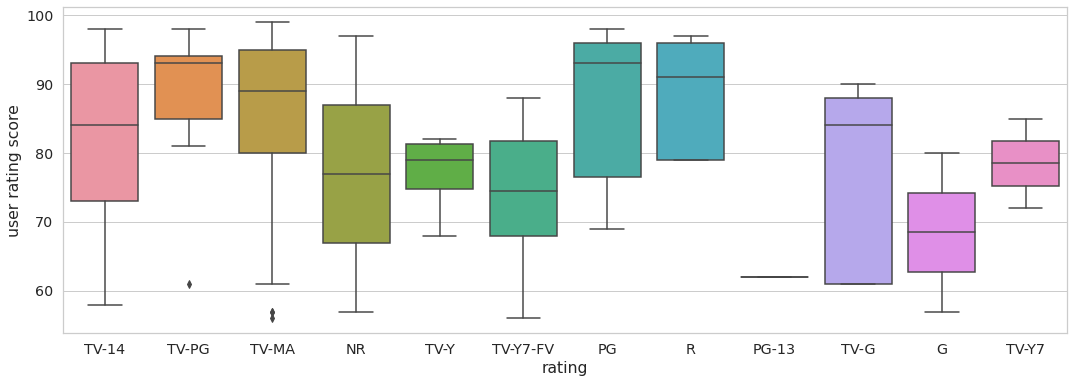

In [361]:
recent_data = data_known_rate[data_known_rate['release year'] >= max_year - 4]
recent_grouped_rate = recent_data.groupby('rating')['user rating score'].mean()

#1 Answer: TV-PG
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.boxplot(x = 'rating', 
                 y = 'user rating score', 
                 data = recent_data, 
                 ax = ax)

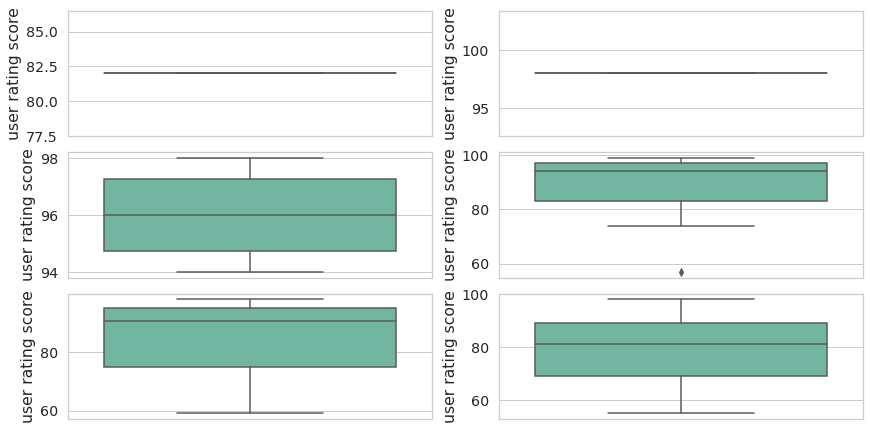

In [434]:
#2
def get_decades(): 
    decade = 10
    decades = np.arange(min_year, max_year, decade)
    decades_copy = decades.copy()
    all_years = data_known_rate['release year'].values
    
    deleted_cnt = 0
    for i, year in enumerate(decades):
        mask = np.in1d(np.arange(year, year + decade, 1), all_years)
        if not mask.any():
            decades_copy = np.delete(decades_copy, i - deleted_cnt)
            deleted_cnt += 1
            
    return decades_copy
    
    
decades = get_decades()
rows_cnt = (decades.size + 1) // 2
fig, ax = plt.subplots(nrows = rows_cnt, 
                       ncols = 2, 
                       figsize = (rows_cnt * 4, 6))

for i, year in enumerate(decades):
    years_rng = np.arange(year, year + decade, 1)
    dec_data = data_known_rate[data_known_rate['release year'].isin(years_rng)]
    sns.boxplot(y = 'user rating score', 
                data = dec_data, 
                ax = ax[i // 2, i % 2])
    
fig.tight_layout()

**Вывод:** Из графика видно, что с течением времени средние оценки пользователей уменьшались. Это связано с ростом числа запускаемых шоу

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [435]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [449]:
ytb_df = df.merge(category, 
                  how = 'left', 
                  left_on = 'category_id', 
                  right_on = 'id')
del ytb_df['id']
ytb_df

,trending_date,category_id,views,likes,dislikes,comment_count,name
0,14,22,62408,334,190,50,People & Blogs
1,14,22,330043,43841,2244,2977,People & Blogs
2,14,24,424596,49854,714,2944,Entertainment
3,14,22,112851,3566,122,80,People & Blogs
4,14,24,243469,36216,631,1692,Entertainment
...,...,...,...,...,...,...,...
1595,21,2,5498,373,19,49,Autos & Vehicles
1596,21,2,40394,1339,179,201,Autos & Vehicles
1597,21,25,3516,65,7,4,News & Politics
1598,21,25,47507,4372,231,2380,News & Politics


Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [472]:
views_by_cat = pd.pivot_table(ytb_df, 
               values = 'views', 
               index = 'trending_date', 
               columns = 'name', 
               aggfunc = 'sum', 
               fill_value = 0)
views_by_cat

name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
trending_date,,,,,,,,,,,,,,,
14,1350890,2310887,139723,5010384,636616,885597,2191619,733907,1010044,4740267,2013597,2053694,951608,608587,104076
15,2076443,4152389,28850,5289490,931837,1609621,1562421,1585619,1225112,4931179,0,6637302,656799,1181720,136549
16,2051608,4156893,6963,3373346,1160112,1583149,129763,4720464,1174092,4763680,608073,6855094,548936,1193647,2271
17,1386676,3556025,146943,12299938,1820958,557074,1250164,9179397,1251367,5976118,541708,2521015,609770,577087,0
18,1713087,3806238,256076,7519942,2725012,600307,1468139,6972429,1056007,5154219,16179,8351102,808860,64261,253369
19,1736740,3556578,310830,5877590,1075440,193316,156958,1329904,1028665,4353670,12928,9396340,0,911646,406558
20,962761,5648120,270585,8174020,2574276,851814,1402284,1527219,657263,4628820,8792,818570,491488,600913,186876
21,1421017,4627423,186909,4585563,2532978,981217,350009,809274,1214178,6889111,164127,638900,164981,722192,26321


Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

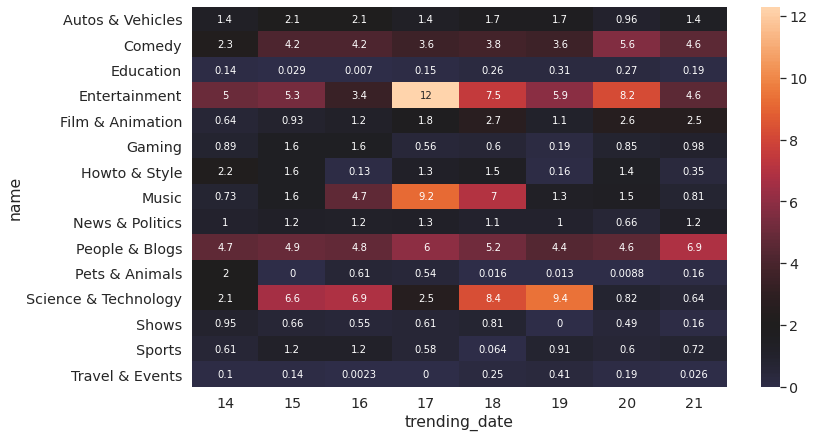

In [473]:
fig, ax = plt.subplots(figsize = (12, 7))
ax = sns.heatmap(views_by_cat.T / 10 ** 6, 
                 annot = True, 
                 center = 2, 
                 ax = ax)

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [474]:
views_by_cat = pd.pivot_table(ytb_df, 
               values = 'views', 
               index = 'trending_date', 
               columns = 'name', 
               aggfunc = 'sum', 
               fill_value = 0, 
               margins = True, 
               margins_name = 'Всего просмотров')
views_by_cat

name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,Всего просмотров
trending_date,,,,,,,,,,,,,,,,
14,1350890,2310887,139723,5010384,636616,885597,2191619,733907,1010044,4740267,2013597,2053694,951608,608587,104076,24741496
15,2076443,4152389,28850,5289490,931837,1609621,1562421,1585619,1225112,4931179,0,6637302,656799,1181720,136549,32005331
16,2051608,4156893,6963,3373346,1160112,1583149,129763,4720464,1174092,4763680,608073,6855094,548936,1193647,2271,32328091
17,1386676,3556025,146943,12299938,1820958,557074,1250164,9179397,1251367,5976118,541708,2521015,609770,577087,0,41674240
18,1713087,3806238,256076,7519942,2725012,600307,1468139,6972429,1056007,5154219,16179,8351102,808860,64261,253369,40765227
19,1736740,3556578,310830,5877590,1075440,193316,156958,1329904,1028665,4353670,12928,9396340,0,911646,406558,30347163
20,962761,5648120,270585,8174020,2574276,851814,1402284,1527219,657263,4628820,8792,818570,491488,600913,186876,28803801
21,1421017,4627423,186909,4585563,2532978,981217,350009,809274,1214178,6889111,164127,638900,164981,722192,26321,25314200
Всего просмотров,12699222,31814553,1346879,52130273,13457229,7262095,8511357,26858213,8616728,41437064,3365404,37272017,4232442,5860053,1116020,255979549


В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

In [478]:
pd.crosstab(index = ytb_df['trending_date'], 
            columns = ytb_df['name'], 
            values = ytb_df['views'],
            aggfunc = 'sum', 
            normalize = 'all',
            margins = True, 
            margins_name = 'Всего просмотров')

name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,Всего просмотров
trending_date,,,,,,,,,,,,,,,,
14,0.005277,0.009028,0.000546,0.019573,0.002487,0.003460,0.008562,0.002867,0.003946,0.018518,0.007866,0.008023,0.003718,0.002377,0.000407,0.096654
15,0.008112,0.016222,0.000113,0.020664,0.003640,0.006288,0.006104,0.006194,0.004786,0.019264,0.000000,0.025929,0.002566,0.004616,0.000533,0.125031
16,0.008015,0.016239,0.000027,0.013178,0.004532,0.006185,0.000507,0.018441,0.004587,0.018610,0.002375,0.026780,0.002144,0.004663,0.000009,0.126292
17,0.005417,0.013892,0.000574,0.048050,0.007114,0.002176,0.004884,0.035860,0.004889,0.023346,0.002116,0.009849,0.002382,0.002254,0.000000,0.162803
18,0.006692,0.014869,0.001000,0.029377,0.010645,0.002345,0.005735,0.027238,0.004125,0.020135,0.000063,0.032624,0.003160,0.000251,0.000990,0.159252
19,0.006785,0.013894,0.001214,0.022961,0.004201,0.000755,0.000613,0.005195,0.004019,0.017008,0.000051,0.036707,0.000000,0.003561,0.001588,0.118553
20,0.003761,0.022065,0.001057,0.031932,0.010057,0.003328,0.005478,0.005966,0.002568,0.018083,0.000034,0.003198,0.001920,0.002348,0.000730,0.112524
21,0.005551,0.018077,0.000730,0.017914,0.009895,0.003833,0.001367,0.003161,0.004743,0.026913,0.000641,0.002496,0.000645,0.002821,0.000103,0.098891
Всего просмотров,0.049610,0.124286,0.005262,0.203650,0.052572,0.028370,0.033250,0.104923,0.033662,0.161876,0.013147,0.145605,0.016534,0.022893,0.004360,1.000000


**Вывод:** Проблема сводных таблиц заключается в том, что в них не видны соотношения между данными из разных строк/столбцов.  
Решением данной проблемы является использование `crosstab` вместо `pivot_table`

---

### Задача 5

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

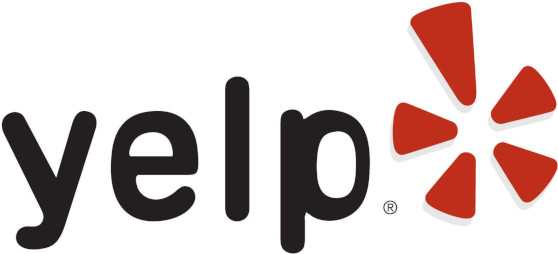

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [71]:
yelp_data = pd.read_csv('yelp_business.csv', sep = ',')
del yelp_data['Unnamed: 0']
yelp_data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [107]:
cities_cnt = yelp_data.groupby('city')['postal_code'].count()
sorted_cities_cnt = cities_cnt.sort_values(ascending = False)
sorted_cities_cnt.head()

city
Las Vegas     26655
Phoenix       17121
Toronto       17102
Charlotte      8517
Scottsdale     8201
Name: postal_code, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

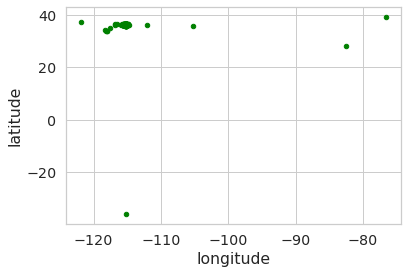

In [127]:
N = sorted_cities_cnt.index[0]
N_data = yelp_data[yelp_data['city'] == N]
ax = N_data.plot(x = 'longitude', 
                 y = 'latitude', 
                 kind = 'scatter', 
                 color = 'green')

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком. Попробуйте также для графиков в этой задаче автоматически подгружать карту города в качестве фона графика, используя <a href="https://plotly.com/python/scattermapbox/">примеры</a>.

*Замечание. Если у вас возникает ошибка `Notebook validation failed`, попробуйте открыть ноутбук текстовым редактором и в самом конце заменить `"nbformat_minor": 1` на `"nbformat_minor": 4`.*

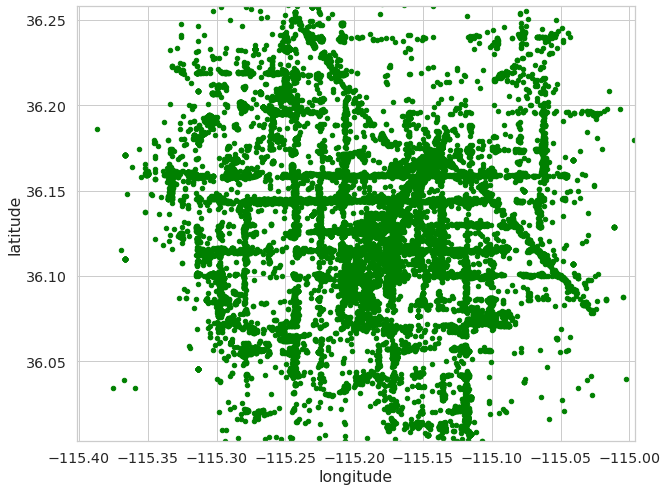

In [141]:
longitude_rng = get_avg_rng(N_data['longitude'])
latitude_rng = get_avg_rng(N_data['latitude'])

ax = N_data.plot(x = 'longitude', 
                 y = 'latitude', 
                 xlim = longitude_rng, 
                 ylim = latitude_rng, 
                 figsize = (10, 8), 
                 kind = 'scatter', 
                 color = 'green')

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [157]:
yelp_sc = pd.read_csv('yelp_review.csv', sep = ',')
del yelp_sc['Unnamed: 0']
yelp_sc.head()

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [158]:
yelp_sc.set_index(keys = 'business_id', inplace = True)
yelp_sc.head()

,stars
business_id,
AEx2SYEUJmTxVVB18LlCwA,5
VR6GpWIda3SfvPC-lg9H3w,5
CKC0-MOWMqoeWf6s-szl8g,5
ACFtxLv8pGrrxMm6EgjreA,4
s2I_Ni76bjJNK9yG60iD-Q,4


In [165]:
N_sc = yelp_sc.loc[yelp_sc.index.isin(N_data.business_id)]
N_sc.head()

,stars
business_id,
8QWPlVQ6D-OExqXoaD2Z1g,5
pLZ9oZM8c6MNbRlg06lBPg,1
6Q7-wkCPc1KF75jZLOTcMw,2
9Jc3W0aR9Xf2gcHI0rEXsw,1
xVEtGucSRLk5pxxN0t4i6g,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [167]:
N_gr_mean_cnt = N_sc.groupby('business_id').aggregate([np.mean, np.size])
N_gr_mean_cnt.head()

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша.

In [171]:
N_gr_mean_cnt.columns = ['avg_score', 'reviews_cnt']
N_gr_mean_cnt.head()

,avg_score,reviews_cnt
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [172]:
N_data.set_index(keys = 'business_id', inplace = True)

In [181]:
N_data = N_data.join(other = N_gr_mean_cnt, how = 'inner')
N_data = N_data[['latitude', 
                 'longitude', 
                 'categories', 
                 'name', 
                 'avg_score', 
                 'reviews_cnt']]
N_data.head()

,latitude,longitude,categories,name,avg_score,reviews_cnt
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

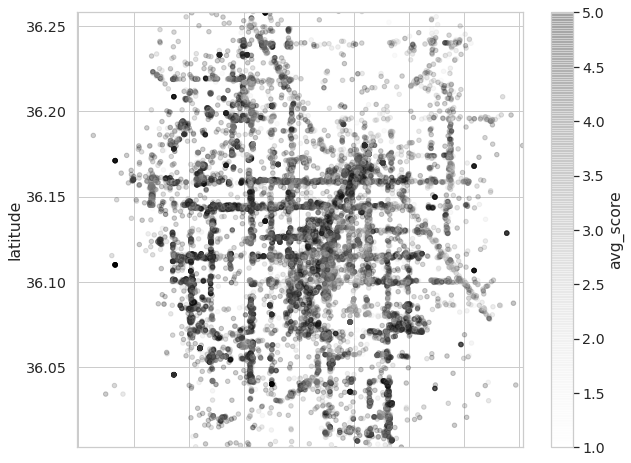

In [192]:
ax = N_data.plot(x = 'longitude', 
                 y = 'latitude', 
                 c = 'avg_score', 
                 xlim = longitude_rng, 
                 ylim = latitude_rng, 
                 figsize = (10, 8), 
                 kind = 'scatter', 
                 alpha = 0.2)

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [201]:
latitude_rnd = np.round(N_data['latitude'] * 4, decimals = 1) * 0.25
longitude_rnd = np.round(N_data['longitude'] * 4, decimals = 1) * 0.25

N_data['latitude'] = latitude_rnd
N_data['longitude'] = longitude_rnd
N_data.head()

,latitude,longitude,categories,name,avg_score,reviews_cnt
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.200,-115.275,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.200,-115.250,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.075,-115.125,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.050,-115.275,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.100,-115.050,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

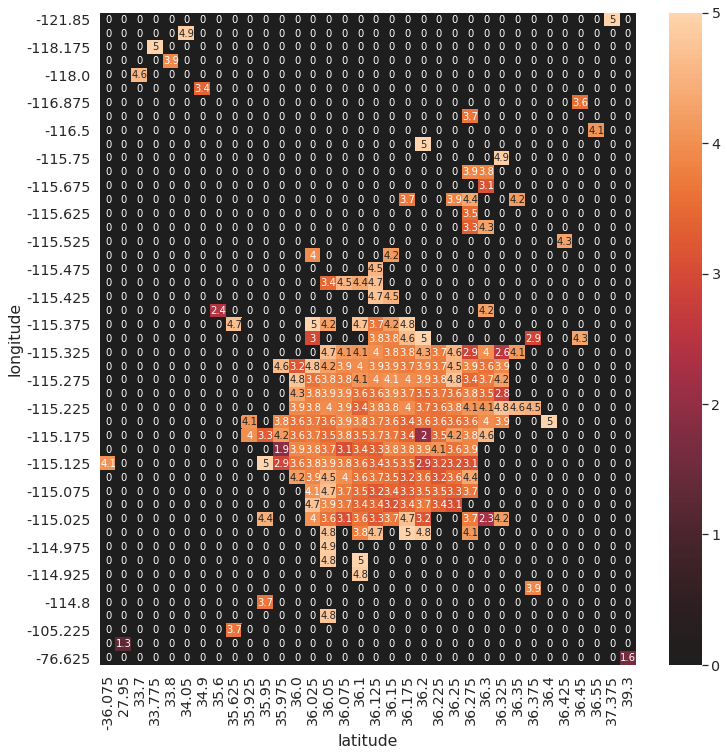

In [208]:
avg_sc_tbl = pd.pivot_table(N_data, 
                            values = 'avg_score', 
                            index = 'longitude', 
                            columns = 'latitude', 
                            fill_value = 0)

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.heatmap(avg_sc_tbl, 
                 annot = True, 
                 # center = 3, 
                 ax = ax)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:**
1. Если в районе мало компаний, то его средняя оценка не равносильна средней оценки другого района, в котором гораздо больше компаний. Например, вряд ли кто-то захочет посетить район, в котором находится единственная компания, имеющая высокий средний балл
2. Если не центрировать карту по среднему значению, то может случиться так, что отдалённые друг от друга значения имеют схожий цветовой оттенок. Например, если бы значения таблицы находились бы в диапазоне от 0 до 100, то значения 70 и 90 имели бы похожие цвета

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

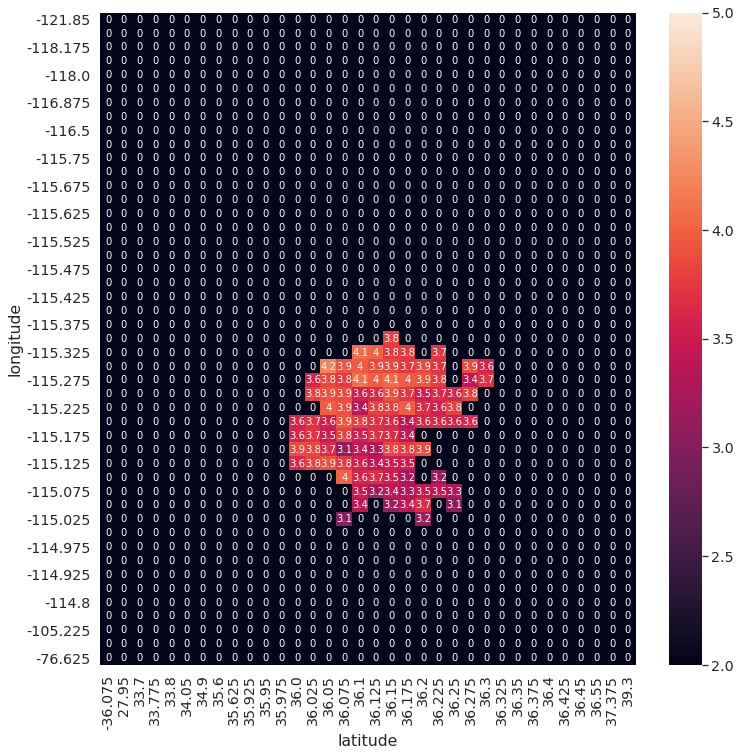

In [272]:
avg_sc_tbl = pd.pivot_table(N_data, 
                            values = 'avg_score', 
                            index = 'longitude', 
                            columns = 'latitude', 
                            aggfunc = lambda x: np.mean(x) 
                                      if np.size(x) >= 30 else 0, 
                            fill_value = 0)

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.heatmap(avg_sc_tbl, 
                 annot = True, 
                 vmin = 2, 
                 vmax = 5, 
                 ax = ax)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Убедились в том, что нужно выставлять миним. и макс значения для цвет. гаммы и что важно отображать районы, у которых хотя бы n компаний

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [282]:
N_data.categories[N_data.categories.str.contains('Restaurant')]

business_id
Pd52CjgyEU3Rb8co6QfTPw    Nightlife;Bars;Barbeque;Sports Bars;American (...
4srfPk1s8nlm1YusyDUbjg                     Fast Food;Restaurants;Sandwiches
n7V4cD-KqqE3OXk0irJTyA    Arcades;Arts & Entertainment;Gastropubs;Restau...
F0fEKpTk7gAmuSFI0KW1eQ                                  Italian;Restaurants
Wpt0sFHcPtV5MO9He7yMKQ                        Restaurants;Fast Food;Burgers
                                                ...                        
Kbbm6Vd5UdbP10dwjBghRw                        Restaurants;Fast Food;Burgers
UpW3jyJ3_kTG7oDSflwnMA                                     Restaurants;Thai
e2ApirIzYID9xIye0r_gKQ    Salad;Breakfast & Brunch;Sandwiches;Burgers;Re...
Fv4EXwV30rwGD2NzN1ekgA         Asian Fusion;Restaurants;Japanese;Sushi Bars
6HdzmAatFoB8UDep4n9QIw    Breakfast & Brunch;American (New);American (Tr...
Name: categories, Length: 5902, dtype: object

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>